In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

In [2]:
df = pd.read_csv('stud_math.csv', encoding="utf-8")

### Первичный осмотр данных

In [3]:
df.sample(15)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
175,GP,M,17,U,LE3,T,4.0,3.0,teacher,other,...,-6.0,yes,yes,no,4.0,4.0,4.0,4.0,4.0,45.0
370,MS,F,19,U,LE3,T,3.0,2.0,services,services,...,-6.0,yes,no,yes,3.0,2.0,2.0,3.0,4.0,45.0
293,GP,F,17,R,LE3,T,3.0,1.0,services,other,...,-12.0,yes,no,NaN,3.0,1.0,2.0,3.0,6.0,90.0
269,GP,F,18,R,GT3,T,2.0,1.0,other,other,...,-6.0,no,yes,yes,4.0,3.0,5.0,3.0,0.0,0.0
101,GP,M,16,U,GT3,T,4.0,4.0,services,teacher,...,-9.0,yes,yes,yes,4.0,4.0,3.0,4.0,NaN,85.0
115,GP,M,16,U,GT3,T,4.0,4.0,teacher,teacher,...,-6.0,yes,NaN,no,5.0,4.0,4.0,5.0,2.0,80.0
373,MS,F,17,R,GT3,T,1.0,2.0,other,NaN,...,-3.0,yes,yes,NaN,NaN,5.0,5.0,1.0,14.0,25.0
100,GP,M,16,U,GT3,T,4.0,4.0,services,services,...,-3.0,yes,yes,no,4.0,5.0,5.0,4.0,14.0,25.0
168,GP,F,16,NaN,GT3,T,2.0,2.0,other,other,...,-6.0,yes,yes,no,5.0,1.0,5.0,4.0,0.0,0.0
278,GP,F,18,U,GT3,T,4.0,4.0,health,health,...,-6.0,yes,yes,yes,2.0,4.0,4.0,4.0,15.0,40.0


In [4]:
df.shape

(395, 30)

In [6]:
df.isnull().sum()

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

In [10]:
df.isnull().sum()

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

* Почти во всех столюцах есть пропуски. Наибольшее количество в Pstatus и Paid

In [8]:
df.dtypes

school                  object
sex                     object
age                      int64
address                 object
famsize                 object
Pstatus                 object
Medu                   float64
Fedu                   float64
Mjob                    object
Fjob                    object
reason                  object
guardian                object
traveltime             float64
studytime              float64
failures               float64
schoolsup               object
famsup                  object
paid                    object
activities              object
nursery                 object
studytime, granular    float64
higher                  object
internet                object
romantic                object
famrel                 float64
freetime               float64
goout                  float64
health                 float64
absences               float64
score                  float64
dtype: object

In [12]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


### Fedu - Образование отца

In [18]:
df.sort_values(by='Fedu', ascending=False)[:10]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
11,GP,F,15,U,GT3,NaN,2.0,40.0,services,other,...,-9.0,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
85,GP,F,15,U,GT3,T,4.0,4.0,services,services,...,-6.0,yes,yes,yes,4.0,4.0,4.0,5.0,6.0,40.0
108,GP,M,15,R,GT3,NaN,4.0,4.0,other,other,...,-12.0,yes,yes,yes,1.0,3.0,5.0,1.0,6.0,65.0
224,GP,F,16,U,GT3,T,4.0,4.0,NaN,services,...,-9.0,yes,yes,no,5.0,3.0,2.0,5.0,0.0,70.0
104,GP,M,15,U,GT3,A,3.0,4.0,NaN,other,...,-6.0,yes,yes,no,5.0,4.0,4.0,1.0,0.0,90.0
102,GP,M,15,U,GT3,T,4.0,4.0,services,other,...,-3.0,yes,yes,no,NaN,3.0,3.0,5.0,4.0,70.0
101,GP,M,16,U,GT3,T,4.0,4.0,services,teacher,...,-9.0,yes,yes,yes,4.0,4.0,3.0,4.0,NaN,85.0
100,GP,M,16,U,GT3,T,4.0,4.0,services,services,...,-3.0,yes,yes,no,4.0,5.0,5.0,4.0,14.0,25.0
233,GP,M,16,U,GT3,T,4.0,4.0,health,other,...,-6.0,yes,yes,no,4.0,2.0,4.0,1.0,2.0,65.0


In [26]:
df["Fedu"] = df.Fedu.apply(lambda x: 4.0 if x > 4.0 else x)

<AxesSubplot:ylabel='Frequency'>

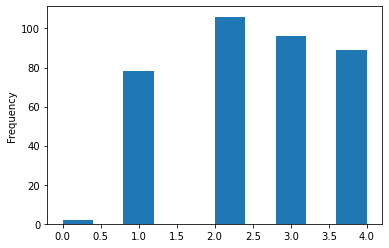

In [28]:
df["Fedu"].plot(kind="hist")

### Internet

In [31]:
df["internet"].value_counts(dropna=False, normalize=True)

yes    0.772152
no     0.141772
NaN    0.086076
Name: internet, dtype: float64

In [14]:
df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.138018,0.081508,-0.015556,0.228047,0.015556,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
Medu,-0.161704,1.000000,0.275598,-0.173515,0.078589,-0.245463,-0.078589,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.213349
Fedu,-0.138018,0.275598,1.000000,0.030646,0.057199,-0.150821,-0.057199,0.040577,-0.066556,-0.023282,0.027251,0.004695,0.078573
traveltime,0.081508,-0.173515,0.030646,1.000000,-0.102206,0.064699,0.102206,-0.016857,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.057199,-0.102206,1.000000,-0.178992,-1.000000,0.045894,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.150821,0.064699,-0.178992,1.000000,0.178992,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.344338
"studytime, granular",0.015556,-0.078589,-0.057199,0.102206,-1.000000,0.178992,1.000000,-0.045894,0.121969,0.051280,0.080016,0.026544,-0.115741
famrel,0.068899,-0.010050,0.040577,-0.016857,0.045894,-0.022655,-0.045894,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112
freetime,0.029023,0.025335,-0.066556,-0.021937,-0.121969,0.098382,0.121969,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.135107,0.064164,-0.023282,0.037636,-0.051280,0.120914,0.051280,0.081154,0.296437,1.000000,-0.015608,-0.048738,-0.129685


### studytime - время на учебу помимо школы в неделю

In [22]:
df["studytime"].sort_values(ascending=True)[:10]

197    1.0
153    1.0
154    1.0
156    1.0
157    1.0
158    1.0
160    1.0
162    1.0
151    1.0
163    1.0
Name: studytime, dtype: float64

<AxesSubplot:ylabel='Frequency'>

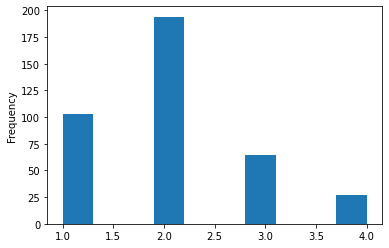

In [24]:
df["studytime"].plot(kind="hist")